In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras


In [24]:
df=pd.read_csv('cars.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [26]:
x=df.drop('sales',axis=1)
y=df['sales']


In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1007)

In [28]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((770, 5), (770,), (193, 5), (193,))

In [29]:
scaler=MinMaxScaler()

In [30]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [31]:
ytrain[0:10]

922    29560
404     5040
734    28842
504    10401
394     2832
105    19634
231      650
618    12256
698    17176
320     1376
Name: sales, dtype: int64

In [32]:
ytrain=np.asarray(ytrain)
ytest=np.asarray(ytest)

In [34]:
ytrain[0:10]

array([29560,  5040, 28842, 10401,  2832, 19634,   650, 12256, 17176,
        1376])

In [47]:
ytest.shape

(193,)

In [33]:
type(xtrain),type(ytrain),type(xtest),type(ytest)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [35]:
xtrain.shape

(770, 5)

In [38]:
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [43]:
history = model.fit(xtrain, ytrain, epochs=250, batch_size=50,  verbose=1, validation_split=0.2)

Train on 616 samples, validate on 154 samples
Epoch 1/250
616/616 [==============================] - 0s 122us/step - loss: 37290860.9221 - mse: 37290860.0000 - val_loss: 33664233.3766 - val_mse: 33664232.0000
Epoch 2/250
616/616 [==============================] - 0s 222us/step - loss: 37193441.5065 - mse: 37193440.0000 - val_loss: 33571278.4675 - val_mse: 33571280.0000
Epoch 3/250
616/616 [==============================] - 0s 82us/step - loss: 37095438.7208 - mse: 37095436.0000 - val_loss: 33476499.7403 - val_mse: 33476498.0000
Epoch 4/250
616/616 [==============================] - 0s 113us/step - loss: 37001639.2987 - mse: 37001640.0000 - val_loss: 33378816.4416 - val_mse: 33378816.0000
Epoch 5/250
616/616 [==============================] - 0s 272us/step - loss: 36902265.2532 - mse: 36902268.0000 - val_loss: 33276541.6364 - val_mse: 33276542.0000
Epoch 6/250
616/616 [==============================] - 0s 93us/step - loss: 36807652.5844 - mse: 36807648.0000 - val_loss: 33176234.8052 - v

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


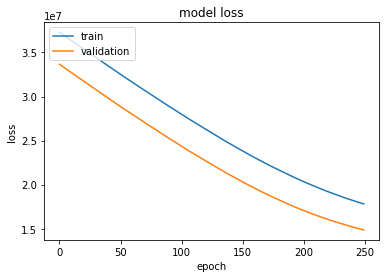

In [44]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predicted_value=model.predict(xtest)
predicted_value

In [48]:
predicted_value=predicted_value.reshape(-1,)

In [49]:
results=pd.DataFrame({'Actual':ytest,'Predicted':predicted_value})

In [50]:
results.head()

,Actual,Predicted
0,10747,7182.376465
1,9913,14381.114258
2,3328,7627.970215
3,5580,6242.274902
4,15541,14981.354492


## Use the new Data for prediction

In [58]:
xnew = np.array([[32, 1, 54, 35100, 7140]])
xnew= scaler.transform(xnew)
ynew= model.predict(xnew)
#invert normalize
#ynew = scaler_y.inverse_transform(ynew) 
xnew1 = scaler.inverse_transform(xnew)
print("X=%s, Predicted=%s" % (xnew1[0], ynew[0]))

X=[3.20e+01 1.00e+00 5.40e+01 3.51e+04 7.14e+03], Predicted=[19871.135]


In [56]:
df[df.age<=35]
2	30	1	58	41576	6215	27754

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
...,...,...,...,...,...,...
946,25,1,10,3205,6823,5332
951,24,1,26,946,1059,2509
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
